# 데이터분석

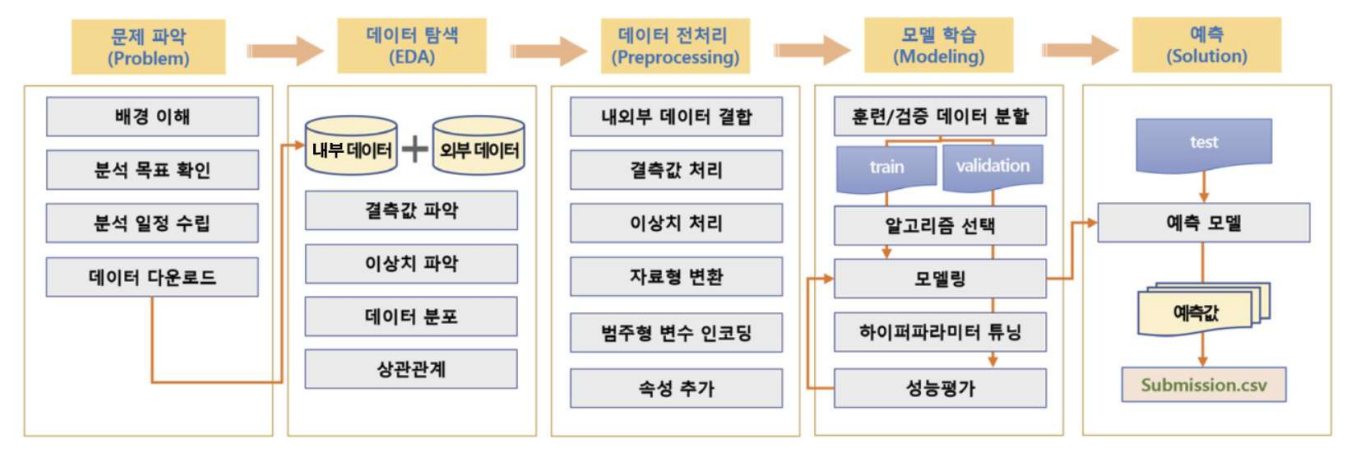

1. 문제 파악 : 목표 설정, 분석 방법과 일정 수립
2. 데이터 탐색 : 데이터 이상 유무 확인 & 데이터 구조 파악. 데이터 분포와 상관관계 탐색
3. 데이터 전처리 : 데이터를 정리하는 단계.
4. 모델 학습
5. 예측 (test)
6. 서비스

## 문제파악

In [2]:
X = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
Y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

## 데이터 탐색

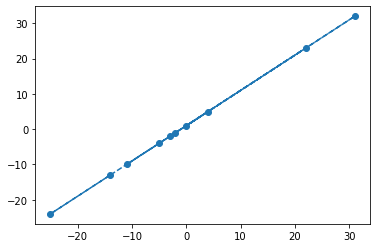

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'o--')
plt.show()

## 데이터 전처리

In [6]:
import pandas as pd
df = pd.DataFrame({'X':X, 'Y':Y})
df

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [7]:
# feature 와 label 분류
X_train = df.loc[:, ['X']]
Y_train = df.loc[:, ['Y']]

## 모델 학습

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

## 테스트

In [9]:
lr.coef_, lr.intercept_
# y = ax + b
#   - a : coef_
#   - b : intercept_

(array([[1.]]), array([1.]))

In [11]:
print('a :', lr.coef_[0][0])
print('b :', lr.intercept_[0])

a : 0.9999999999999999
b : 0.9999999999999999


In [16]:
## 예측
import numpy as np
X_new = np.array(11).reshape(1,1)
print(f'shape : {X_new.shape}, {X_new}')

shape : (1, 1), [[11]]


In [15]:
lr.predict(X_new)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.]])

In [ ]:
X_test = np.arange(11, 16, 1).reshape(-1, 1)
X_test

In [ ]:
y_pred = lr.predict(X_test)
y_pred

# 예제 - 붓꽃 구분하기

## 데이터 수집 - 크롤링, 데이터 변환

In [17]:
# 라이브러리 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
iris = datasets.load_iris()


In [18]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
print('데이터셋 크기:', iris['target'].shape)

데이터셋 크기: (150,)


In [21]:
print('데이터셋 내용:\n', iris['target'])

데이터셋 내용:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
iris['data'][:7, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [24]:
iris['data'].shape

(150, 4)

In [25]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] # 4개의 값을 임의로 넣는다.
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [27]:
df['Target'] = iris['target'] # (target)필드를 하나 추가
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.describe() # 데이터들에 대한 평균값, 표준편차, 최소값, ...

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [30]:
df.isnull().sum() # null인 값을 확인하기. (insull true가 된 값들을 모두 합침(sum))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

### 중복 데이터 확인

In [32]:
# 중복 데이터 확인
df.duplicated().sum()

1

In [33]:
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [34]:
df.loc[(df.sepal_length==5.8) & (df.petal_width==1.9), :] # 중복된 행을 확인하기 (값을 검색하여여)

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [35]:
df = df.drop_duplicates() # 중복값 제거

### 상관관계 분석

In [36]:
# 변수 간의 상관관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


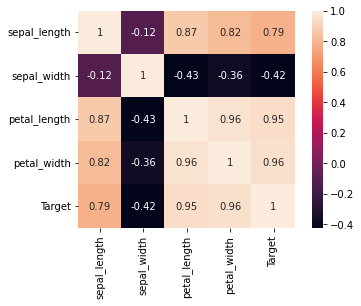

In [37]:
# 상관 계수 히트맵으로 보기
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)

In [38]:
df['Target'].value_counts() # value 가 어떻게 모였는지 확인

0    50
1    50
2    49
Name: Target, dtype: int64

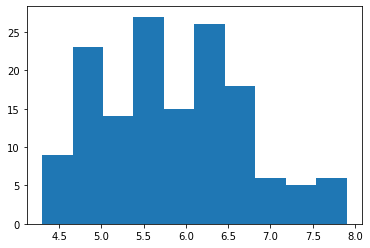

In [39]:
plt.hist(x='sepal_length', data=df)
plt.show()

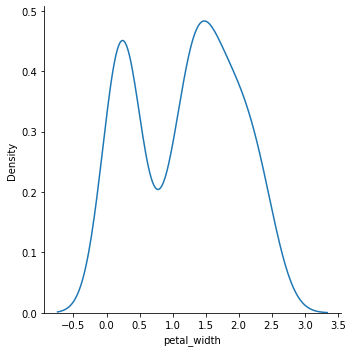

In [40]:
sns.displot(x='petal_width', data=df, kind='kde')
plt.show()

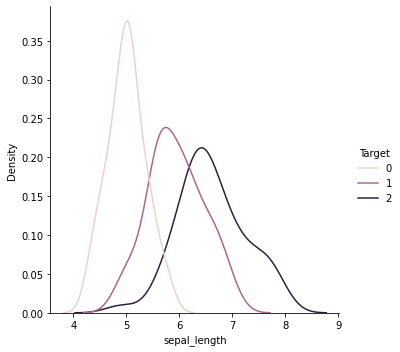

In [41]:
sns.displot(x='sepal_length', hue='Target', kind='kde', data=df)
plt.show()

# 꽃의 종류는, 꽃의 크기에 영향을 받고 있다는 것을 알 수 있음.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


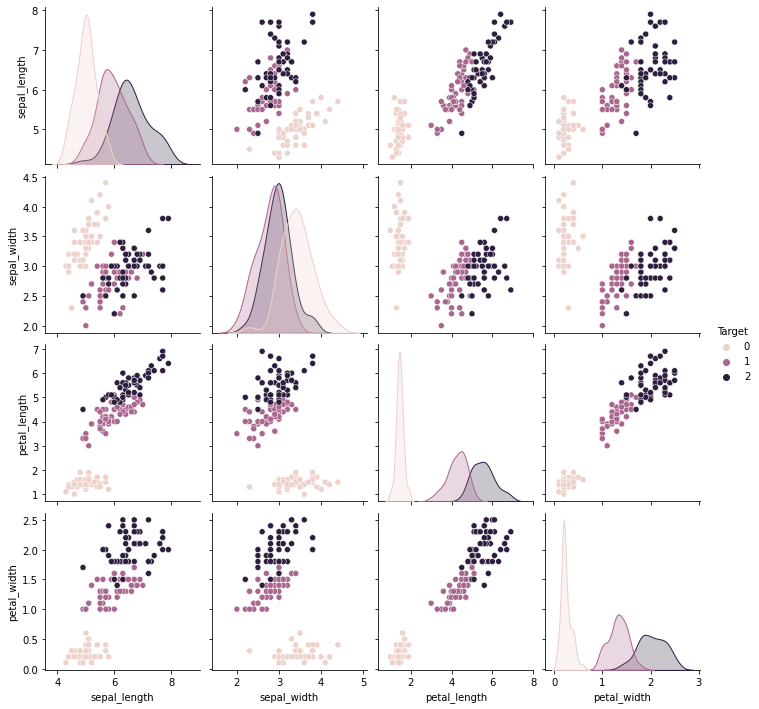

In [42]:
sns.pairplot(df, hue='Target', size=2.5, diag_kind='kde')
plt.show()
# 특정 데이터들의 구분이 힘들 것이라는 예측이 가능

In [44]:
from sklearn.model_selection import train_test_split

X_data = df.loc[:, 'sepal_length':'petal_width']
Y_data = df.loc[:, 'Target']

|X_T|X_L|
|---|---|
|Y_T|Y_L|

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)


### KNN(k-nearest-neighbor classfy) 사용

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_knn_pred = knn.predict(X_test)
print('예측값: ', y_knn_pred[:5])

예측값:  [0 1 1 2 1]


In [50]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("정확도: ", knn_acc)

정확도:  0.9666666666666667


## 예측 웹 서비스

- 사용자의 데이터가 쌓이면서 추가적으로 또 학습을 한다.

# 사이킷런 학습 모델 만들기 : 식용 버섯 판단 웹서비스

In [53]:
import pandas as pd
import joblib
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
df = pd.read_csv('./sample.csv', header=0, encoding='cp949')

In [56]:
label = []
data = []
for row_index, row in df.iterrows():
  label.append(row.iloc[0])
  row_data = []
  for v in row.iloc[1:]:
    row_data.append(v)
  data.append(row_data)

In [57]:
label[:5]

['먹어', '먹지마', '먹지마', '먹어', '먹지마']

In [58]:
data[:5]

[[7, 2, 1], [1, 5, 3], [5, 1, 4], [1, 1, 7], [1, 6, 7]]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, label)

In [60]:
X_train

[[1, 6, 7],
 [5, 7, 6],
 [1, 5, 3],
 [1, 1, 1],
 [2, 1, 3],
 [1, 4, 9],
 [7, 2, 1],
 [6, 2, 1],
 [4, 2, 4],
 [3, 8, 3],
 [3, 1, 5],
 [5, 1, 4]]

In [61]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
predict = clf.predict(X_test)
predict

array(['먹지마', '먹지마', '먹지마', '먹지마'], dtype='<U3')

In [66]:
ac_score = metrics.accuracy_score(y_test, predict)
print(f"정확도: {ac_score}")

정확도: 0.5


In [68]:
f = open('./model.pkl', 'wb')
pickle.dump(clf, f)
f.close() # 학습된 결과 파일을 모델 파일로 만들어주는 것.